In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd

/home/mc741/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


## Read tables

In [2]:
catalogs = glob.glob(f"data/output/dmu26_XID+MIPS_SSDF_cat*", recursive=True)
cat1=Table.read('data/output/dmu26_XID+MIPS_SSDF_cat')

In [3]:
for c in catalogs:
    cat = Table.read(c)
    for i,source in enumerate(cat['help_id']):
        if source in cat1['help_id']:
            if cat[i]['FErr_MIPS_24_u'] < cat1[i]['FErr_MIPS_24_u']:
            #if c[i]['Rhat_MIPS_24'] < cat1[i]['Rhat_MIPS_24']:
                cat1[i] = c[i]
            else:
                continue
        else:
            cat1.add_row(cat[i])


In [4]:
SSDF_cat=cat1

## Look at Symmetry of PDFs to determine depth level of catalogue

2.7453837


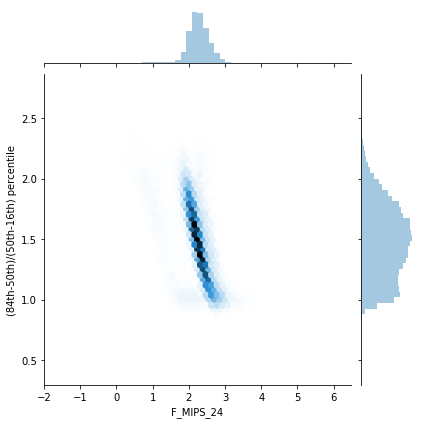

In [5]:
import seaborn as sns
skew=(SSDF_cat['FErr_MIPS_24_u']-SSDF_cat['F_MIPS_24'])/(SSDF_cat['F_MIPS_24']-SSDF_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SSDF_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


Both seem to have flux pdfs that become Gaussian at ~30$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [6]:
from astropy.table import Column
SSDF_cat.add_column(Column(np.zeros(len(SSDF_cat), dtype=bool),name='flag_mips_24'))


In [7]:
ind_SSDF=(SSDF_cat['Pval_res_24']>0.5) | (SSDF_cat['F_MIPS_24'] < 30.0)

In [8]:
SSDF_cat['flag_mips_24'][ind_SSDF]=True


In [9]:
SSDF_cat.write('./data/output/dmu26_XID+MIPS_SSDF_cat.fits', format='fits',overwrite=True)

### Check Map


In [10]:
from astropy.io import fits
import pylab as plt

In [11]:
MIPS_pval=fits.open('./data/output/Pval/dmu26_XID+MIPS_SSDF_Bayes_Pval1.fits')


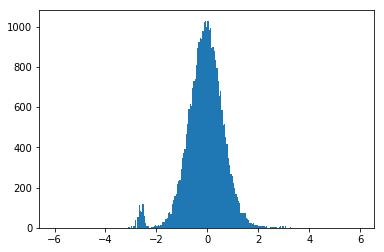

In [12]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));

In [1]:
plt.imshow(Pval[1].data)

NameError: name 'plt' is not defined